In [2]:
# Question
#
# This task requires you to create a classifier for horses or humans using
# the provided data. Please make sure your final layer is a 1 neuron, activated by sigmoid as shown.
# Please note that the test will use images that are 300x300 with 3 bytes color depth so be sure to design your neural network accordingly


import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
tf.random.set_seed(1234)

def solution_model():
    _TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
    _TEST_URL = "https://storage.googleapis.com/download.tensorflow.org/data/validation-horse-or-human.zip"
    urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
    local_zip = 'horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp/horse-or-human/')
    zip_ref.close()
    urllib.request.urlretrieve(_TEST_URL, 'validation-horse-or-human.zip')
    local_zip = 'validation-horse-or-human.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./tmp/validation-horse-or-human/')
    zip_ref.close()

    train_datagen = ImageDataGenerator(
        #Your code here. Should at least have a rescale. Other parameters can help with overfitting.)
        rescale = 1/255., 
        shear_range = 0.2,
        zoom_range =0.2,
        horizontal_flip=True)
   
    validation_datagen = ImageDataGenerator(
        #Your Code here
        rescale= 1/255.
    )

    train_generator = train_datagen.flow_from_directory(
        #Your Code Here
        './tmp/horse-or-human',
        target_size=(300,300),
        batch_size=32,
        class_mode='binary'
    )

    validation_generator = validation_datagen.flow_from_directory(
        #Your Code Here
        './tmp/validation-horse-or-human/',
        target_size=(300,300),
        batch_size=32,
        class_mode='binary'
    )


    model = tf.keras.models.Sequential([
        # Note the input shape specified on your first layer must be (300,300,3)
        # Your Code here
        tf.keras.layers.Conv2D(32,(3,3), input_shape=(300,300,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3),activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten() ,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.5),    #hjkim
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        # This is the last layer. You should not change this code.
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # print(model.summary())


    model.compile(#Your Code Here#
        loss='binary_crossentropy', optimizer='adam', metrics=['acc']
    )

    checkpoint_path = 'my_checkpoint2.ckpt'
    checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, save_best_only=True , monitor='val_loss', verbose=1)
    model.fit(
        #Your Code Here#
        train_generator, validation_data=validation_generator, epochs=10, callbacks=[checkpoint])
   
    model.load_weights(checkpoint_path)
    # NOTE: If training is taking a very long time, you should consider setting the batch size appropriately on the generator, and the steps per epoch in the model.fit#
    return model


# Note that you'll need to save your model as a .h5 like this
# This .h5 will be uploaded to the testing infrastructure
# and a score will be returned to you
if __name__ == '__main__':
    model = solution_model()
    model.save("cat3_horses_or_humans(typeB)_model1.h5")

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - ETA: 0s - loss: 0.5545 - acc: 0.7225
Epoch 00001: val_loss improved from inf to 0.41844, saving model to my_checkpoint2.ckpt
33/33 [==============================] - 43s 1s/step - loss: 0.5545 - acc: 0.7225 - val_loss: 0.4184 - val_acc: 0.8672
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 0.2353 - acc: 0.9202
Epoch 00002: val_loss did not improve from 0.41844
33/33 [==============================] - 39s 1s/step - loss: 0.2353 - acc: 0.9202 - val_loss: 1.0258 - val_acc: 0.8320
Epoch 3/10
33/33 [==============================] - ETA: 0s - loss: 0.1435 - acc: 0.9523
Epoch 00003: val_loss did not improve from 0.41844
33/33 [==============================] - 39s 1s/step - loss: 0.1435 - acc: 0.9523 - val_loss: 2.4651 - val_acc: 0.7148
Epoch 4/10
33/33 [==============================] - ETA: 0s - loss: 0.1526 - acc: 0.9591
Epoch 00004: v

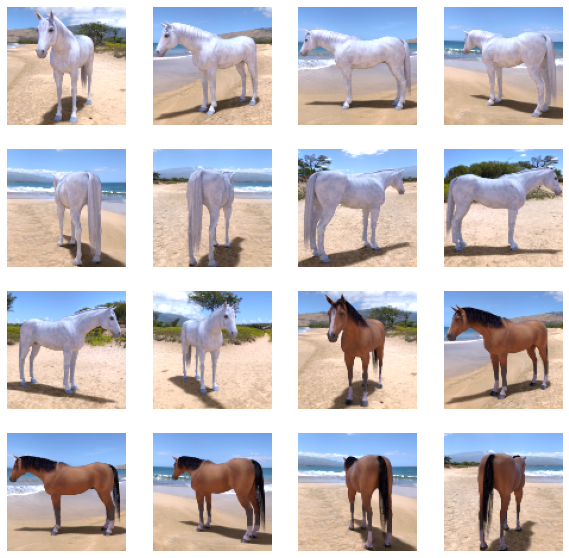

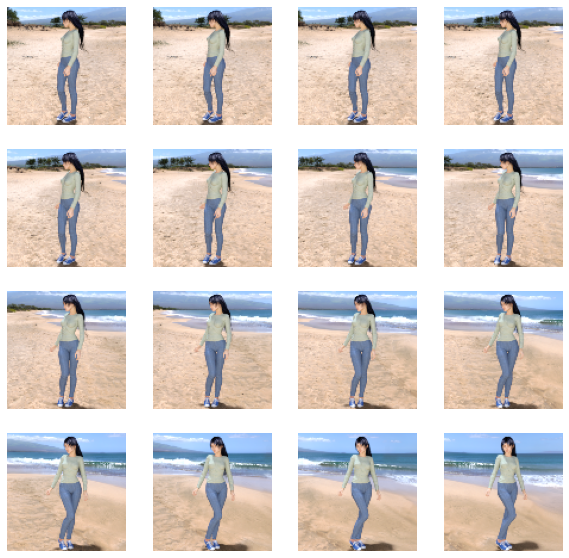

In [25]:
### 원본 이미지 시각화 
import tensorflow as tf
import urllib
import zipfile
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt 
import glob
import math 

# _TRAIN_URL = "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"
# urllib.request.urlretrieve(_TRAIN_URL, 'horse-or-human.zip')
# local_zip = 'horse-or-human.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('./tmp/horse-or-human/')
# zip_ref.close()

dir_path1 = './tmp/horse-or-human/horses/*.*'
dir_path2 = './tmp/horse-or-human/humans/*.*'
dir_path1s = glob.glob(dir_path1) 
dir_path2s = glob.glob(dir_path2) 

plt.figure(figsize=(10,10))
for i, path in enumerate(dir_path1s[:16]):
    img = load_img(path, target_size=(100,100))
    arr = img_to_array(img)
    arr = tf.expand_dims(arr, 0)
    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
for i, path in enumerate(dir_path2s[:16]):
    img = load_img(path, target_size=(100,100))
    arr = img_to_array(img)
    arr = tf.expand_dims(arr, 0)
    plt.subplot(4, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

Found 1027 images belonging to 2 classes.


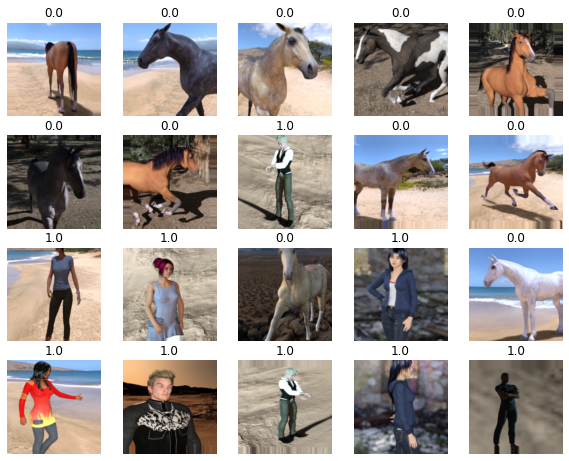

In [34]:
# ImageDataGenerator / Augumentation 후의 이미지 시각화 

train_datagen = ImageDataGenerator(
    rescale = 1/255., 
#     rotation_range=20, 
#     width_shift_range=0.1,
#     height_shift_range=0.1, 
#     shear_range = 0.1,
    zoom_range =0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    #Your Code Here
    './tmp/horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
)
image, label = next(train_generator)

plt.figure(figsize=(10,10))
for n in range(20):
    plt.subplot(5,5,n+1)
    plt.imshow(image[n])
    plt.title(label[n])
    plt.axis('off')